### Importación de librerías y carga de imagen

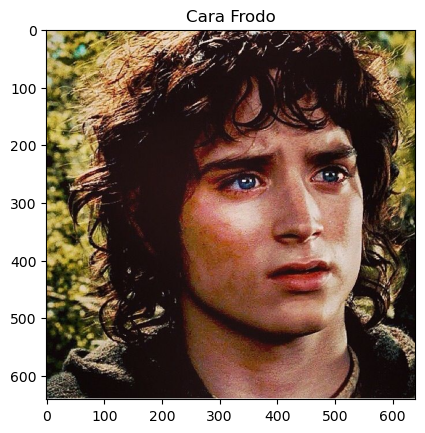

In [ ]:
import cv2
from matplotlib import pyplot as plt
import dlib
import numpy as np
import csv

image = cv2.imread("frodo.jpg")
imaxe_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

nombre_sujeto = "Frodo"
archivo = "caras.csv"

plt.imshow(imaxe_color)
plt.title(f'Cara {nombre_sujeto}')
plt.show()

### Importación de herramientas de reconocimiento facial y declaración de listas donde se guardarán vectores y nombres de los rostros

In [9]:

predictor_path ="./shape_predictor_5_face_landmarks.dat"
face_rec_model_path = "./dlib_face_recognition_resnet_model_v1.dat"


detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)


known_face_encodings = []
known_face_names = []


### Añadir cara de la imagen a registro de caras conocidas

In [10]:
dets = detector(imaxe_color, 1)
print("Number of faces detected: {}".format(len(dets)))
posicions = dets[0]
display(posicions)
shape = sp(imaxe_color,posicions)

face_descriptor = np.array(facerec.compute_face_descriptor(imaxe_color, shape))
display(face_descriptor)

known_face_encodings.append((face_descriptor, nombre_sujeto))


Number of faces detected: 1


rectangle(241,170,562,491)

array([-0.14830418,  0.06504592,  0.11369397, -0.1514672 , -0.12862051,
        0.05695107, -0.06187629, -0.00376601,  0.08616073,  0.01196778,
        0.19761042, -0.04351338, -0.28271246,  0.01699158,  0.01457955,
        0.12365773, -0.16628139, -0.13006604, -0.00211912, -0.08581255,
       -0.02714075,  0.09545512, -0.06905403,  0.08856597, -0.18369891,
       -0.18815926, -0.10184988, -0.12710503, -0.05898497, -0.10249091,
        0.01918198, -0.03548067, -0.12639141, -0.0258283 ,  0.08952371,
        0.03483666, -0.05422493, -0.06922733,  0.15246657,  0.03169912,
       -0.12728332, -0.0257693 ,  0.11645451,  0.27048492,  0.20564206,
        0.06083749, -0.02110441, -0.07552174,  0.12061072, -0.30517811,
        0.09781398,  0.14306481,  0.09262259,  0.07633286,  0.03391825,
       -0.12225097,  0.0039432 ,  0.19509448, -0.23586315,  0.15934245,
        0.01323794, -0.10077278, -0.01550903, -0.07776231,  0.19077206,
        0.13283846, -0.14014298, -0.22411656,  0.16893615, -0.16

### Devuelve el nombre si la cara se encuentra en el registro de caras conocidas

In [11]:
face_names = []

dets = detector(imaxe_color, 1)
tolerancia = 0.6
for d in dets:

    shape = sp(imaxe_color,d)
    face_descriptor = np.array(facerec.compute_face_descriptor(imaxe_color, shape))
    print(np.linalg.norm(face_descriptor - known_face_encodings[0][0]))
    # See if the face is a match for the known face(s)
    matches = [(np.linalg.norm(face_descriptor - match[0]), match[1]) for match in known_face_encodings if np.linalg.norm(face_descriptor - match[0]) <= tolerancia]
    print(matches)
    if len(matches) == 0:
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),"Desconocido"))
    else:
        carasOrdenadas = sorted(matches,key=lambda x: x[0]) 
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),carasOrdenadas[0][1]))


0.0
[(0.0, 'Frodo')]


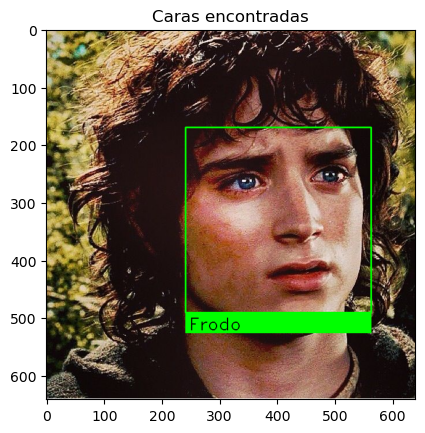

In [12]:
imaxeConMarcas = imaxe_color.copy() 
for (top, right, bottom, left), name in face_names:
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size

    color = (0, 255, 0) if not name=="NonSei" else (0, 0, 255)
    # Draw a box around the face
    cv2.rectangle(imaxeConMarcas, (left, top), (right, bottom), color, 2)

    # Draw a label with a name below the face
    cv2.rectangle(imaxeConMarcas, (left, bottom + 35), (right, bottom), color, cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(imaxeConMarcas, name, (left + 6, bottom + 30), font, 1.0, (0, 0, 0), 1)

plt.imshow(imaxeConMarcas)
plt.title('Caras encontradas')
plt.show()   